<a href="https://colab.research.google.com/github/frankthairu/CNN-on-MIST-dataset-python/blob/main/Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2

## Importing Relevant Libraries


In [ ]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow. keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dropout 
from tensorflow. keras.utils import plot_model 
from matplotlib import pyplot 
import matplotlib.pyplot as plt 
import numpy as np


In [ ]:
#loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()




In [ ]:
#reshaping the training and testing data
x_train = x_train. reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 
x_test.shape [2], 1))



In [ ]:
#normalizing the values of pixels
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


## Data Exploration

In [ ]:
type(x_train)
# Images are encoded as numpy arrays

numpy.ndarray

In [ ]:
x_train.dtype
# images are assigned to the float datatype

dtype('float32')

In [ ]:
x_train.shape


(60000, 28, 28, 1)

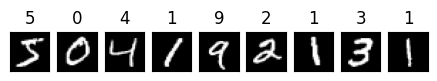

In [ ]:
fig = plt.figure(figsize= (6,5))
for i in range (9):
  ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray') 
  ax.set_title(y_train[i])

# Taking an example I am Plotting first 9 set of images

In [ ]:
#Checking shape of the example above
image_shape= x_train.shape[1:]
image_shape

# This gives a shape 0f 28 * 28 * 1 (1 being the value of the color i.e grey scale color)


(28, 28, 1)

## Defining the model

## Part 2 : Redesigning CNN (Using one Convolutional layer)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1 )))
model.add(MaxPool2D((2, 2)))
model.add(Dropout (0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu', input_shape=(28*28, )))
model.add(Dense (10, activation='softmax'))






In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 500)               2704500   
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                      

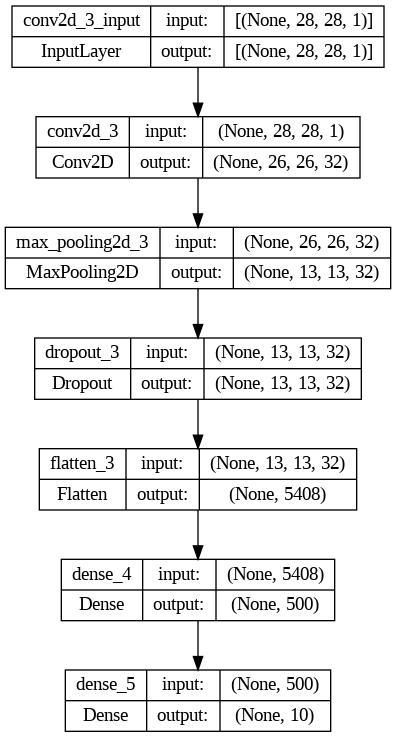

In [ ]:
plot_model(model, 'model.jpg', show_shapes=True)

## Compilation Phase

 

In [ ]:
model. compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])




In [ ]:
batch_size = 126
total_steps = 200
steps_per_epoch = min(total_steps, len(x_train) // batch_size)

# Train the model using the step method
model.fit(x_train, y_train, batch_size=batch_size, steps_per_epoch=steps_per_epoch, epochs=total_steps // steps_per_epoch)





200/200 [==============================] - 26s 128ms/step - loss: 0.1271 - accuracy: 0.9612


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print (f'Accuracy: {accuracy*100}')



Accuracy: 96.21000289916992


We reach a good accuracy of 96.2%
